In [4]:
import sklearn
sklearn.__version__

'0.19.1'

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

type(iris)

sklearn.utils.Bunch

`Bunch`是一个类似`dict`的数据结构，`.data`保存`n_samples`,`n_features`的数据类型为`2D-ndarray`的数据`.target`保存着响应变量（response variables）

In [35]:
print(type(iris.data))
# 2d ndarray
print(iris.data[:4])

# feature names and target names(y, label)
print(iris.feature_names, iris.target_names)

print(iris.target[::5])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


# 分类器例子（SVM）

使用SVM分类器识别图片表示的数字（0-9）

In [36]:
from sklearn import svm
# just treate it as an black box classifier
clf = svm.SVC(gamma=0.001, C=100.)

# using all data except the last entry to train the model
clf.fit(digits.data[:-1], digits.target[:-1])

# using the 'clf' classifier to predict the last entry
## the result output: 8
clf.predict(digits.data[-1:])

array([8])

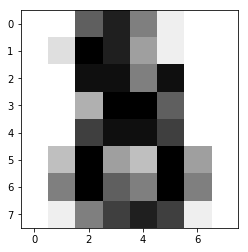

In [41]:
import matplotlib.pyplot as plt
# show the image of the last digit
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')

# 模型持久化

使用python built-in的模块`pickle`对模型进行存储

In [45]:
X, y = iris.data, iris.target
clf = svm.SVC()
clf.fit(X, y)

import pickle
# convert model(python object) to bytes stream
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

clf2.predict(X[0:1])

array([0])

In [44]:
y[0]

0

使用`joblib`来进行存储模型

In [46]:
from sklearn.externals import joblib

joblib.dump(clf, 'iris_svc_pkl')

clf3 = joblib.load('iris_svc_pkl')

clf3.predict(X[0:1])

array([0])

# 模型重构和更新超参

估计器（estimator）的超参数（Hyper-parameters）可以通过`sklearn.pipeline.Pipeline.set_params`
方法进行更新，然后再调用`fit()`就可以覆盖之前的训练结果了

In [49]:
import numpy as np

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
# 二项分布（又称n重伯努利分布 X~(n,p) 每次实验发生正例的次数为p，执行n次）
# 变量x的取值范围为（0，n）,P(x=k)=(n,k)p^k(1-p)^(n-k)
# 取值（0~1）——单个样本执行1次实验 其中正例发生概率是0.5 执行100次采样
y = rng.binomial(1, 0.5, 100)
print(X[:4])
print(y[:4])

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]]
[1 0 0 1]


In [50]:
X_test = rng.rand(5,10)

from sklearn.svm import SVC
clf = SVC()
clf.set_params(kernel='linear').fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [52]:
clf.set_params(kernel='rbf').fit(X,y)
clf.predict(X_test)

array([0, 0, 0, 1, 0])

# 多类多标签拟合

In [58]:
from sklearn.preprocessing import LabelBinarizer
X = np.array([[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]])
y = [0,0,1,1,2]
y = LabelBinarizer().fit_transform(y)
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [59]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(estimator=SVC(random_state=0))
clf.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])